In [1]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib as mpt
import seaborn as sns
import datetime as dt 
import warnings
import os
import time
import random
from IPython import display
import sklearn as skl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

os.chdir('C:\\Users\\laeti\\Desktop\\AURORA')
data = pd.read_excel("Data-Former.xlsx").set_index('Dates')
data_pct = pd.read_excel('Data-StdPct.xlsx').set_index('Dates')
#data_pct = data_pct.iloc[:,1:]
data_fold = [data, data_pct]
features = ['prices', 'vol', 'skewness', 'kurtosis', 'correl']
asset = ['eq','bds']
for _ in data_fold:
    _.rename(columns = lambda x: x.lower(), inplace=True)
    
data['eq,returns,all'] = data['eq,prices,all'].pct_change()
data['bds,returns,all'] = data['bds,prices,all'].pct_change()
print('\nData fields: ', list(data.columns))
print('\nData_pct fields: ', list(data_pct.columns))

### Reminder - Select columns with regex
#data.filter(regex = '^[beginning of columns you want]', axis=1)
#data.filter(regex = '[end of what you want]$', axis=1)
#data.filter(like = '[contains]', axis=1)
# Inverse regex (does not contain) = ^((?![to_exclude]).)*$
# Multiple likes: data.filter(regex='returns|vol|logvol')


Data fields:  ['eq,prices,all', 'bds,prices,all', 'eq,vol,5', 'eq,vol,10', 'eq,vol,21', 'eq,vol,42', 'eq,vol,63', 'eq,vol,126', 'eq,vol,252', 'eq,vol,512', 'bds,vol,5', 'bds,vol,10', 'bds,vol,21', 'bds,vol,42', 'bds,vol,63', 'bds,vol,126', 'bds,vol,252', 'bds,vol,512', 'all,correl,2w', 'all,correl,1m', 'all,correl,2m', 'all,correl,3m', 'all,correl,6m', 'all,correl,1y', 'all,correl,3y', 'all,correl,5y', 'eq,trendiness,2w', 'eq,trendiness,1m', 'eq,trendiness,2m', 'eq,trendiness,3m', 'eq,trendiness,6m', 'eq,trendiness,1y', 'eq,trendiness,3y', 'eq,trendiness,5y', 'bds,trendiness,2w', 'bds,trendiness,1m', 'bds,trendiness,2m', 'bds,trendiness,3m', 'bds,trendiness,6m', 'bds,trendiness,1y', 'bds,trendiness,3y', 'bds,trendiness,5y', 'eq,skewness,3m', 'eq,skewness,6m', 'eq,skewness,1y', 'eq,skewness,3y', 'eq,skewness,5y', 'bds,skewness,3m', 'bds,skewness,6m', 'bds,skewness,1y', 'bds,skewness,3y', 'bds,skewness,5y', 'eq,kurtosis,3m', 'eq,kurtosis,6m', 'eq,kurtosis,1y', 'eq,kurtosis,3y', 'eq,kurt

-- SUMMARY STATS --
Original Dset size (15109, 64) 



,"eq,vol,5","eq,vol,10","eq,vol,21","eq,vol,42","eq,vol,63","eq,vol,126","eq,vol,252","eq,vol,512","bds,vol,5","bds,vol,10","bds,vol,21","bds,vol,42","bds,vol,63","bds,vol,126","bds,vol,252","bds,vol,512"
count,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000
mean,13.399941,13.642787,13.886267,14.119131,14.258169,14.489514,14.686047,14.711638,5.799660,5.891400,5.965732,6.023137,6.052937,6.099452,6.132317,6.117967
std,8.127178,7.710489,7.253535,6.763218,6.434149,5.790494,5.060286,4.433446,3.329165,3.161745,3.013340,2.886033,2.813541,2.686410,2.558773,2.449977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.586158,9.082186,9.530012,9.881928,10.068947,10.550112,11.351783,12.080678,3.737346,3.958671,4.127602,4.249265,4.309860,4.455249,4.767397,4.822977
50%,11.495369,11.870643,12.227557,12.451559,12.826868,13.438898,13.710127,14.168526,5.165517,5.360114,5.502096,5.648795,5.740498,5.747544,5.792000,6.026117
75%,15.895698,16.070864,16.240391,16.601508,16.739874,16.636016,17.156586,17.228161,7.137072,7.136090,7.141343,7.120623,7.094493,7.118087,7.101451,7.472792
max,122.541337,93.700674,70.010640,59.951910,53.215911,42.324350,34.248382,27.712586,28.131761,23.781421,20.278428,17.835911,16.845345,15.047188,13.349096,11.727943


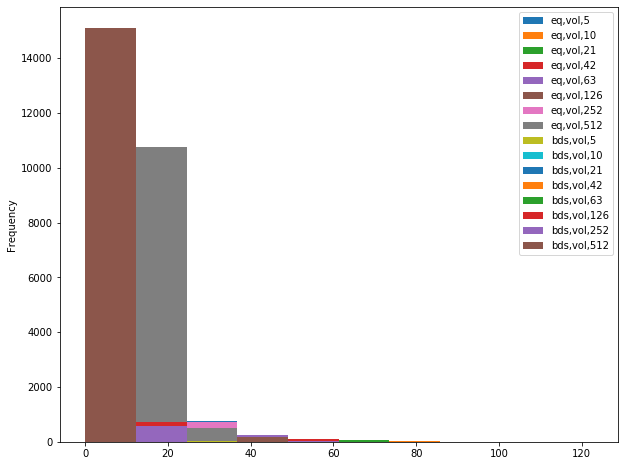

In [7]:
### Quick EDA
# Rq1: sur les max eq- 75% à environ 16% across half lives, mais par contre max à 122, 93, 70, 59, 53, 42...
# Sur les bonds on est plus à 5% across half lives avec rien de fou niveau max 
# Rq2: de la vol à 0? 
print('-- SUMMARY STATS --')
print('Original Dset size', data.shape, '\n')
data.filter(like = 'vol', axis=1).plot(kind = 'hist', figsize = (10,8))
data.filter(like = 'vol', axis=1).describe()

In [8]:
print('Normalized Dset Size', data_pct.shape, '\n')
data_pct.describe()

Normalized Dset Size (14067, 39) 



,"eq, prices, all","bds, prices, all","eq,vol,5","eq,vol,10","eq,vol,21","eq,vol,42","eq,vol,63","eq,vol,126","eq,vol,252","eq,vol,average",...,"eq,trendiness,6m","eq,trendiness,1y","eq,trendiness,average","bds,trendiness,2w","bds,trendiness,1m","bds,trendiness,2m","bds,trendiness,3m","bds,trendiness,6m","bds,trendiness,1y","bds,trendiness,average"
count,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,...,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000
mean,110.237290,162.446362,0.215041,0.232756,0.250105,0.273542,0.290116,0.327075,0.396082,0.283531,...,-0.083125,-0.056146,-0.078562,-0.110865,-0.105083,-0.098458,-0.089332,-0.073569,-0.076399,-0.092284
std,53.836489,82.992285,0.548010,0.537847,0.529025,0.523660,0.520715,0.512464,0.479751,0.481028,...,0.563327,0.557215,0.328038,0.536324,0.543863,0.543522,0.548921,0.546168,0.518989,0.322770
min,38.695139,57.927717,-1.000000,-0.984000,-0.972000,-0.960000,-0.956000,-0.894000,-1.000000,-0.902571,...,-1.000000,-1.000000,-0.865000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.870667
25%,67.795583,90.081025,-0.216000,-0.182000,-0.160000,-0.132000,-0.126000,-0.076000,0.071000,-0.058571,...,-0.566000,-0.536000,-0.324167,-0.573000,-0.574000,-0.563000,-0.562000,-0.536000,-0.502000,-0.331667
50%,96.262703,144.310481,0.292000,0.302000,0.314000,0.362000,0.390000,0.438000,0.512000,0.346000,...,-0.122000,-0.056000,-0.123000,-0.134000,-0.134000,-0.126000,-0.122000,-0.084000,-0.082000,-0.140000
75%,136.032812,213.119387,0.704000,0.718000,0.730000,0.738000,0.746000,0.782000,0.808000,0.694000,...,0.384000,0.380000,0.134333,0.336000,0.342000,0.340000,0.374000,0.376000,0.344000,0.099667
max,291.671262,357.339312,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.984000,0.972000,0.998000,1.000000,1.000000,1.000000,1.000000,0.960333


In [9]:
### A partir de data: création des price returns over period 2w, 1m, 2m, 3m, 6m, 1y 
### Duplicates as digital momentum (indicatrice)

def total_return(series): 
    return (series + 1).prod() - 1

periods = ['2w', '1m', '2m', '3m', '6m', '1y']
to_days = ['10', '21', '42', '63', '126', '252']
pds_to_days = list(zip(periods,to_days))

def gen_digit(data, lkb): 
    if data > data.shift(int(lbk)):
        return 1
    else:
        return -1

for _ in asset: 
    i = 0
    while i < len(periods): 
        #Alternative: data[_+',returns,'+periods[i]] = data[_+',returns,all'].rolling(str(to_days[i])+'D').apply(lambda x: total_return(x))
        data[_+',returns,'+periods[i]] = data[_+',prices,all'].pct_change(periods = int(to_days[i]))
        data[_+',digit,'+periods[i]] = data[_+',prices,all'].diff(int(to_days[i])).apply(lambda x: -1 if x<0 else 1) 
        try: 
            data.rename(columns = {_+',vol,'+pds_to_days[i][1]:_+',vol,'+pds_to_days[i][0]}, inplace=True) #
            data.drop(_+',vol,5', axis=1, inplace =True) 
            data.drop(_+',vol,512', axis=1, inplace = True)
        except KeyError: 
            pass
        data[_+',log,'+periods[i]] = np.log(data[_+',vol,'+periods[i]])
        i = i+1
    
data.at['1962-01-04','eq,log,2w':'bds,log,1y'] = 0 #Removing -inf before normalizing
#data.filter(like='digit').plot(subplots = True, figsize = (12,19))
#plt.show()
#plt.close()
#data.filter(like='logvol').plot(subplots=True, figsize = (10,30))
#plt.show()

In [10]:
# Plot stuff
show = input('Showing what? (beginning, all features, like, timeframe)')
if show == 'beginning':
    show = input('Choice? tuple format: eq/bds, vol...')
    data.filter(regex = '^'+show, axis= 1).plot(subplots= True, figsize = (10,5))
    plt.suptitle('Original DSet for found ' + show)
    try: 
        data_pct.filter(regex = '^'+show,axis = 1).plot(subplots = True, figsize = (10,5))
        plt.suptitle('Normalized DSet for found '+show+' - from Tarek')
    except TypeError: 
        pass
    
elif show == 'features':
    for _ in features: 
        data.filter(like = _, axis= 1).plot(subplots= True, figsize = (10,5))
        plt.suptitle('Original DSet for ' + _)
        try: 
            data_pct.filter(like = _,axis = 1).plot(subplots = True, figsize = (10,5))
            plt.suptitle('Normalized DSet for '+_+' - from Tarek')
        except TypeError:
            pass
        
elif show == 'like': 
    show = input('Like what?')
    data.filter(like = show, axis=1).plot(subplots=True, figsize=(10,25))
    
elif show == 'timeframe':
    show = input('Choice?')
    data.filter(regex = show+'$', axis= 1).plot(subplots= True, figsize = (10,5))
    plt.suptitle('Original DSet for found'+show+' timeframe')
    try:
        data_pct.filter(regex = show+'$',axis = 1).plot(subplots = True, figsize = (10,5))
        plt.suptitle('Normalized DSet for found'+ show +'timeframe - from Tarek')
    except TypeError:
        pass
else:
    pass

Showing what? (beginning, all features, like, timeframe) pass


-- Windsor merged!  (14067, 56) > (14067, 72) > (14067, 79) > (14067, 91)
-- Percentiles merged!  (14067, 56) > (14067, 72) > (14067, 79) > (14067, 91)
-- MinMax merged!  (14067, 56) > (14067, 72) > (14067, 79) > (14067, 91)
-- XpdMM merged!  (14067, 56) > (14067, 72) > (14067, 79) > (14067, 91)


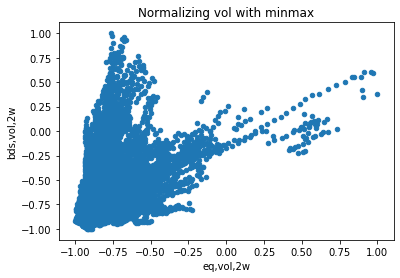

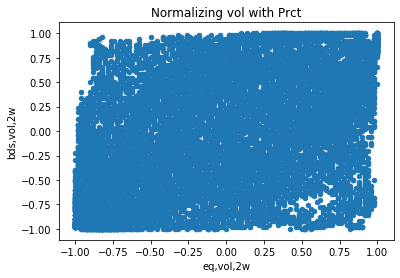

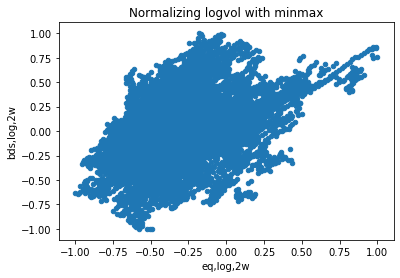

In [11]:
# Multiple Datasets for normalization 
# We could standardize with StandardScaler but data isn't normal 
# MinMax: sensitive to outliers, but try anyway. 
# RobustScaler: robust to outliers (removes median and scales data according to quantile ranges)
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# Robust Scaler = scaling using median and quantiles - substracts the median to all obs then divide by the interquartile differences (75th - 25th) 

#On prévoit 3 datasets concurrents: 
#- Rescaling everywhere avec minmax 
#- Percentile + rescaling
#- Windsor + rescaling

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler

# Dataset to normalize
norm = {}
#to_normalize_col = data.filter(regex='returns|vol|logvol').columns
to_normalize_col = data.filter(regex= '^((?!correl|digit|trendiness|5y).)*$', axis=1).columns
variants= ['Windsor', 'Percentiles', 'MinMax', 'XpdMM']
for _ in variants: # Troncature now (sinon MinMax détruit la logvol)
    norm[_] = data.loc[:,to_normalize_col].copy()
    norm[_] = norm[_].loc['1966-01-03':, :].copy() 
    if norm[_].isna().sum().sum() != 0: 
        print('Null data found in: ', _) #coming from 5y estimates (skewness, kurt) - columns shall be dropped

#Separating correl/trendiness 
correl_data = data.loc[:,'all,correl,1m':'all,correl,5y'].copy()
digit_data = data.filter(like = 'digit', axis=1).copy()
trendiness_data = pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(data.loc['1966-01-03':,'eq,trendiness,2w': 'bds,trendiness,5y']), columns = data.loc[:,'eq,trendiness,2w': 'bds,trendiness,5y'].columns, index=norm['MinMax'].index)
        
#With truncature (max = 2.5stdev)
def windsor(series, std, mean, times):
    if abs((series-mean)/std) >= times and series >= 0: 
        return mean+times*std
    elif abs((series-mean)/std) >= times and series <= 0: 
        return mean-times*std
    else:
        return series
    
for _ in to_normalize_col: 
    norm['Windsor'][_] = norm['Windsor'][_].apply(lambda x: windsor(x, norm['Windsor'][_].std(), norm['Windsor'][_].mean(),2.5))
    norm['Percentiles'][_] = pd.qcut(norm['Percentiles'][_], q= 101, precision = 2, labels=False, retbins=False) #Will contain returns, vol, kurt, logvol... 
    norm['XpdMM'][_] = (norm['XpdMM'][_] - norm['XpdMM'][_].expanding().min()) / \
    (norm['XpdMM'][_].expanding().max() - norm['XpdMM'][_].expanding().min())
    
#Bringing everything between [-1:1]
for _ in variants:
    norm[_] = pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(norm[_]),columns = to_normalize_col, index=norm['MinMax'].index)
    try: 
        s = norm[_].shape
        norm[_] = norm[_].join(trendiness_data)
        h = norm[_].shape
        norm[_] = norm[_].join(correl_data)
        a = norm[_].shape
        norm[_] = norm[_].join(digit_data)
        p = norm[_].shape
        print('--', _, 'merged! ',s,'>',h,'>',a,'>',p) 
    except ValueError:
        pass

#Plotting for double check 
norm['MinMax'].plot.scatter(x = 'eq,vol,2w',y = 'bds,vol,2w', title = 'Normalizing vol with minmax')
norm['Percentiles'].plot.scatter(x = 'eq,vol,2w',y = 'bds,vol,2w', title = 'Normalizing vol with Prct')
norm['MinMax'].plot.scatter(x = 'eq,log,2w',y = 'bds,log,2w', title = 'Normalizing logvol with minmax')

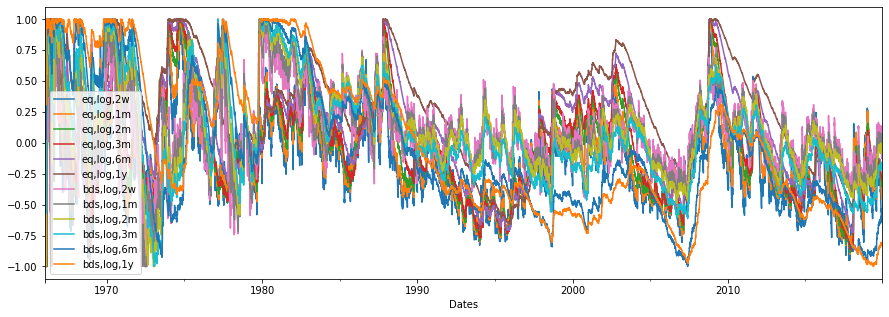

In [12]:
norm['XpdMM'].filter(like='log').plot(figsize=(15,5))

In [13]:
# On tronque norm_c en considérant la logvol
# Merge relevant stuff with Tarek's data & export (on a: prices + vol + correl + trendiness 
# on sort: averages, prices | we want: digit + norm logvol + norm rets | on rename)

data_pct = data_pct.filter(regex = '^((?!average).)*$', axis=1).loc['1970-01-01':, :].copy() #tronqué
for _ in asset: 
    i=0
    while i < len(periods): 
        try: 
            data_pct.rename(columns = {_+',vol,'+pds_to_days[i][1]:_+',vol,'+pds_to_days[i][0]}, inplace=True) #On en profite pour renommer les colonnes 
            data_pct.drop(_+',vol,5', axis=1, inplace =True) #Et pour dropper les vols inutiles
        except KeyError: 
            pass
        i +=1
        
fold = [digit_data, norm['XpdMM'].filter(like = 'log').copy(), norm['XpdMM'].filter(like = 'returns').copy()]
for _ in fold: 
    try: 
        s=data_pct.shape
        data_pct = data_pct.join(_)
        print('Tarek\'s data merged!', s, '>', data_pct.shape)
    except ValueError: 
        pass

#C'est pas propre, tant pis 
for _ in asset:
    try: 
        data_pct.drop(_+',trendiness,2w', axis=1, inplace = True) # On sort la trendiness 2w et la trendiness 1y
        data_pct.drop(_+',trendiness,1y', axis=1, inplace=True)
        data_pct.drop(_+', prices, all', axis=1, inplace=True)
        data_pct.drop(_+',returns,all', axis=1, inplace=True)
    except KeyError: 
        pass

norm['Tk'] = data_pct #Note: à ce stade, on n'utilise plus que norm['Tk'] - contenant des vols pct + logvols, des returns + des digits

Tarek's data merged! (13024, 32) > (13024, 44)
Tarek's data merged! (13024, 44) > (13024, 56)
Tarek's data merged! (13024, 56) > (13024, 70)


-- TRUNCATURE --
Dataset has been split. Keys & windows for norm_c:
W1 : 1970-01-01 00:00:00  -  1982-06-24 00:00:00
W2 : 1982-06-25 00:00:00  -  1994-12-16 00:00:00
W3 : 1994-12-19 00:00:00  -  2007-06-11 00:00:00
W4 : 2007-06-12 00:00:00  -  2019-12-03 00:00:00


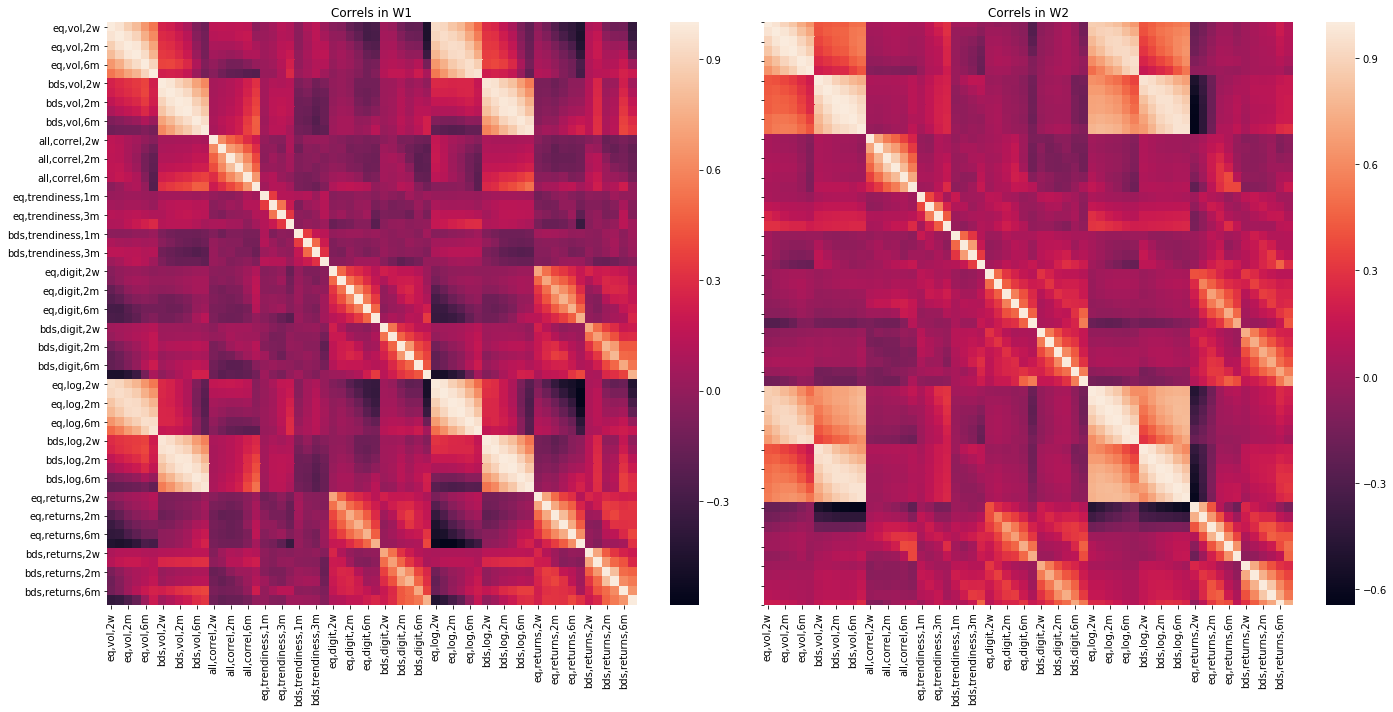

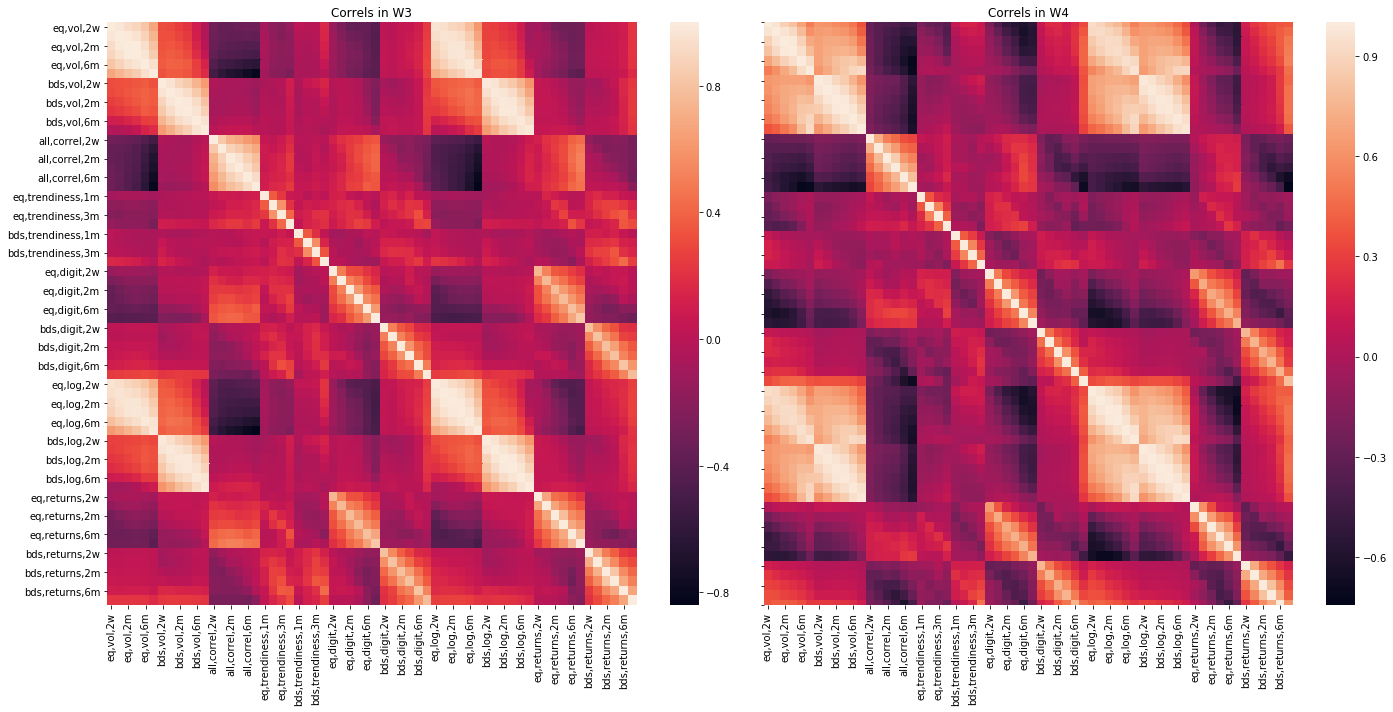

In [14]:
#Puis sortir les mats sur la période actuelle. On splitte le dataset original en 4 avec périodes de 15 ans. 
norm_c = {} # cut
corr = {}
wds = [] 

for i in range(1,5):
    if i == 1: 
        norm_c['W'+str(i)] = norm['Tk'].iloc[:int(np.floor(len(norm['Tk'].index)/4)),:]
    else: 
        norm_c['W'+str(i)] = norm['Tk'].iloc[int(np.floor(len(norm['Tk'].index)/4))*(i-1):int(np.floor(len(norm['Tk'].index)/4))*i,:]
    assert(norm_c['W'+str(i)].T.isna().sum().sum() != 0, 'Some data is missing, correls won\'t turn out right')
    corr['W'+str(i)] = norm_c['W'+str(i)].corr()

print('-- TRUNCATURE --')
print('Dataset has been split. Keys & windows for norm_c:')
for _ in norm_c.keys(): 
    print(_, ':', norm_c[_].index[0],' - ', norm_c[_].index[-1])

#Heatmaps sur les 4 windows
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
sns.heatmap(corr['W1'], cbar = True, annot = False, ax=ax1)
ax1.set_title('Correls in W1')
sns.heatmap(corr['W2'], cbar = True, annot = False,  ax=ax2)
ax2.set_title('Correls in W2')
plt.tight_layout()
plt.show()
plt.close()

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
sns.heatmap(corr['W3'], cbar = True, annot = False, ax=ax1)
ax1.set_title('Correls in W3')
sns.heatmap(corr['W4'], cbar = True, annot = False,  ax=ax2)
ax2.set_title('Correls in W4')
plt.tight_layout()


In [ ]:
'''
# Cercle de Correl
df_cft = pd.DataFrame({'Features':norm_c['Tk'].columns,'Corr_C1':cft[:,0],'Corr_C2':cft[:,1]})
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for _ in range(32):
    plt.annotate(norm_c['Tk'].columns[_],(cft[_,0],cft[_,1]))
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(plt.Circle((0,0),1,color='blue',fill=False))
'''

In [15]:
### PostNormalization 
# Un spécimen return + vol 
# Dans le pcbook, conventions de nom: on veut "rvol,all" + "all,period"
# Dans le pcbook, conventions de stockage: 
    
    # 0 = coordinates
    # 1 = eigenvectors
    # 2 = eigenval
    # 3 = explained var ratio 
    # 4 = correlation w/ features
    # 5 = past features on new vectors 
    
from sklearn.decomposition import PCA
pcbook = {}

def bruteforcePCA(data, period = 'all', exclusion = 'vol', spec = 0):
    storage = []
    pcdata = data
    
    #Removing exclusions
    if len(exclusion.split('|')) > 1: 
        for _ in exclusion.split('|'): 
            print(_)
            print(pcdata.shape) 
            pcdata = pcdata.filter(regex = '^((?!'+_+').)*$', axis=1).copy()
            print(pcdata.shape)
    else: 
        pcdata = pcdata.filter(regex = '^((?!'+exclusion+').)*$', axis=1).copy()

    # Filtering for spec
    if spec == 0: 
        if period == 'all':
            print('All periods, no spec. Will return all pcs across periods.')
        else:   
            if len(period.split('|')) > 1: 
                pcdata = pcdata.filter(regex=period).copy()
            else: 
                pcdata = pcdata.filter(like=period).copy()
    else:
        if len(spec.split('|')) > 1: 
            pcdata = pcdata.filter(regex=spec).copy()
        else:
            pcdata = pcdata.filter(like=spec).copy()
    
    if len(period.split('|')) > 1: 
        
        pcdata = pcdata.filter(regex=period).copy()
        
    elif period != 'all': 
        
        pcdata = pcdata.filter(like=period).copy()
    else: 
        pass 
        
    i=1
    cft_col = []
    for k in range(len(pcdata.columns)):
        cft_col.append('PC'+str(i))
        i+=1 
        
    pca = PCA().fit(pcdata)    
    storage.append(pd.DataFrame(data = pca.transform(pcdata), columns = cft_col, index =pcdata.index)) # [0] stores coordinates
    components = pd.DataFrame(pca.components_, index = cft_col, columns = pcdata.columns).T 
    storage.append(components) # [1] Turning eigenvectors (stored as row-like np.arrays) into df
    eigenval = (len(pcdata)-1)/len(pcdata)*pca.explained_variance_ 
    storage.append((len(pcdata)-1)/len(pcdata)*pca.explained_variance_) # [3] stores eigenvalues as np array
    storage.append(pca.explained_variance_ratio_)
    cft = np.zeros((len(pcdata.columns),len(pcdata.columns))) # [4] cft like 'correl w/ features'
    for k in range(len(pcdata.columns)):
        cft[:,k] = pca.components_[k,:] * np.sqrt(eigenval)[k]
    storage.append(pd.DataFrame(data = cft, columns = cft_col, index = pcdata.columns))
    storage.append(pd.DataFrame(data = np.matmul(pcdata,storage[1]), index = pcdata.index, columns = cft_col)) # [5] Features * Vectors
    storage.append(pcdata.columns)
    
    return storage

In [16]:
### Pcbook empty at this stage
### New naming convention? 
### Kind reminder: trendiness 2w and trendiness 1y have been dropped
### 4x windows, then features combinations + batch export + check correls

for w in norm_c.keys(): #w1,w2,w3,w4
    pcbook[w+',Test1'] = bruteforcePCA(norm_c[w], period = 'all', spec = 'returns|log')
    pcbook[w+',Test2'] = bruteforcePCA(norm_c[w], period = 'all', spec = 'digit|log')
    pcbook[w+',Test3'] = bruteforcePCA(norm_c[w], period = 'all', spec = 'returns|vol', exclusion = 'trendiness')
    pcbook[w+',Test4'] = bruteforcePCA(norm_c[w], period = 'all', spec = 'digit|vol', exclusion = 'trendiness')
    
def ask_display(): 
    rep = input('Show chart? (y/n)')
    if rep == 'y':
        return True
    else: 
        return False
    
def test_v_time(test):
    # Example: showing 4th first eigenvectors across windows + eigenvalues + cve + proj 
    print('-- PCA | ',test, ' | Comparison Across Windows --')
    print('Logvol, returns from xpdMM')
    print('Note: data has been truncated to start in January 70s - explaining changes in cve (last week: 3 PCs to account for 85% of var)')
    print('Last table shows cumulative variance explained by the PCs (rows) across windows (4x)')

    df_cve = pd.DataFrame(data = [0]*len(pcbook['W1,'+test][3]), index = range(1,len(pcbook['W1,'+test][3])+1), columns = {'Empty'})
    for i in range(1,5): 
        df_cve = df_cve.join(pd.DataFrame(pcbook['W'+str(i)+','+test][3].cumsum(), columns = {'CVE_W'+str(i)}, index = df_cve.index))

    # Plotting cumulative explained variance across 4x windows
    df_cve.drop('Empty',axis=1, inplace=True)
    sns.lineplot(data=df_cve)
    plt.title('Cumulative Variance Explained for 24x PCs across 4x windows\n')
    plt.draw()

    # Plotting 4th first eigenvectors across 2x first time windows
    if ask_display(): 
        
        f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
        pcbook['W1,'+test][1].loc[:,'PC1':'PC4'].plot(ax=ax1, kind='bar')
        ax1.set_title(test+': First Eigenvectors in W1')
        ax1.set_xticks(range(len(pcbook['W1,'+test][1].index)))
        ax1.set_xticklabels(labels = pcbook['W1,'+test][1].index, rotation=90)
        pcbook['W2,'+test][1].loc[:,'PC1':'PC4'].plot(ax=ax2, kind='bar')
        ax2.set_xticks(range(len(pcbook['W2,'+test][1].index)))
        ax2.set_title(test+': First Eigenvectors in W2')
        ax2.set_xticklabels(labels = pcbook['W2,'+test][1].index, rotation=90)
        plt.tight_layout()
        plt.show()

        # Plotting the rest
        f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
        pcbook['W3,'+test][1].loc[:,'PC1':'PC4'].plot(ax=ax1, kind='bar')
        ax1.set_title(test+': First 4x Eigenvectors in W3')
        ax1.set_xticks(range(len(pcbook['W3,'+test][1].index)))
        ax1.set_xticklabels(labels = pcbook['W3,'+test][1].index, rotation=90)
        pcbook['W4,'+test][1].loc[:,'PC1':'PC4'].plot(ax = ax2,kind='bar')
        ax2.set_xticks(range(len(pcbook['W4,'+test][1].index)))
        ax2.set_title(test+': First 4x Eigenvectors in W4')
        ax2.set_xticklabels(labels = pcbook['W4,'+test][1].index, rotation=90)
        plt.tight_layout()
        plt.show()
        
    else:
        pass 
    
    print('\n\nCumulative Variance Explained (top 10)\n')
    
    print(df_cve.head(10))

-- PCA |  Test1  | Comparison Across Windows --
Logvol, returns from xpdMM
Note: data has been truncated to start in January 70s - explaining changes in cve (last week: 3 PCs to account for 85% of var)
Last table shows cumulative variance explained by the PCs (rows) across windows (4x)


Show chart? (y/n) y


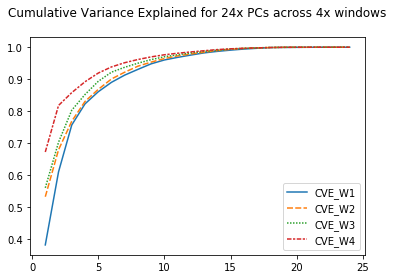

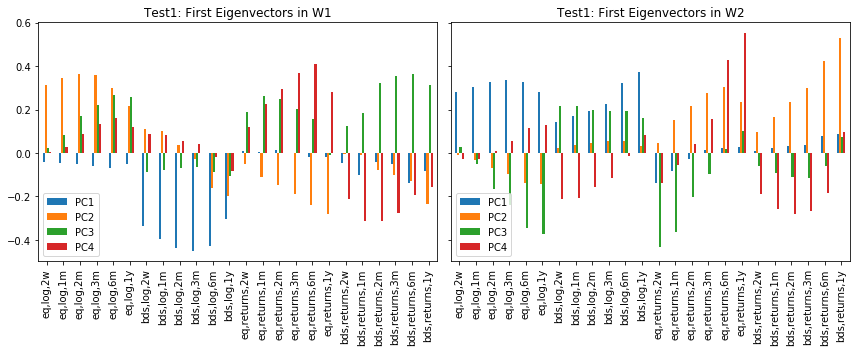

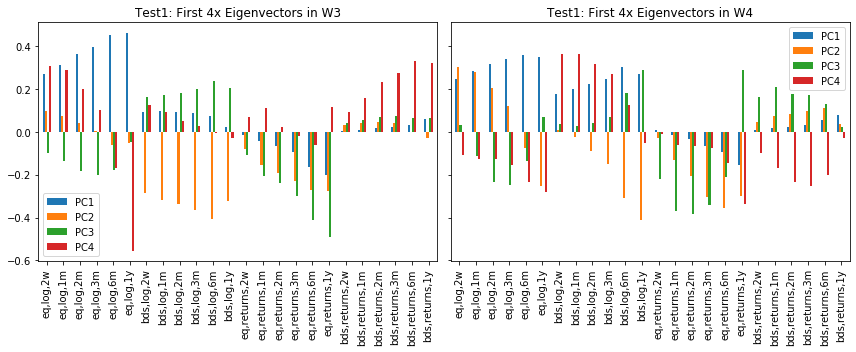



Cumulative Variance Explained (top 10)

      CVE_W1    CVE_W2    CVE_W3    CVE_W4
1   0.382318  0.532884  0.560735  0.672689
2   0.610475  0.679490  0.703121  0.818101
3   0.757107  0.768865  0.803280  0.858172
4   0.822982  0.830620  0.852291  0.892148
5   0.860905  0.868289  0.893360  0.919254
6   0.890376  0.900845  0.922104  0.938501
7   0.912940  0.921995  0.937410  0.951697
8   0.930861  0.940825  0.950111  0.961655
9   0.948215  0.953576  0.961366  0.969897
10  0.960252  0.964710  0.970243  0.976459


In [17]:
### At this point: logvol ou vol | digit ou returns
# Critères des bons PCs: caractère interprétable & narratif des vecteurs + stabilité across 4x windows (DONE)
test_v_time('Test1')

-- PCA |  Test2  | Comparison Across Windows --
Logvol, returns from xpdMM
Note: data has been truncated to start in January 70s - explaining changes in cve (last week: 3 PCs to account for 85% of var)
Last table shows cumulative variance explained by the PCs (rows) across windows (4x)


Show chart? (y/n) y


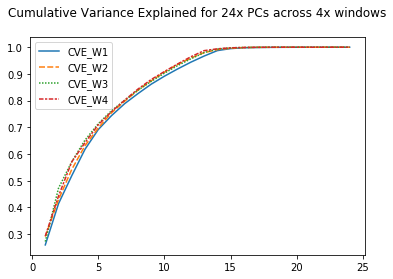

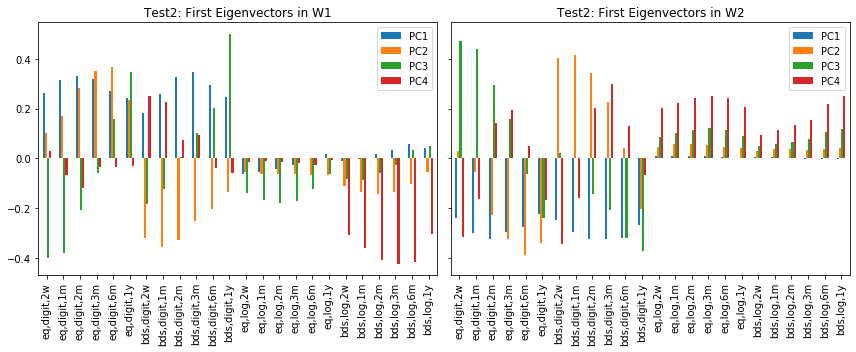

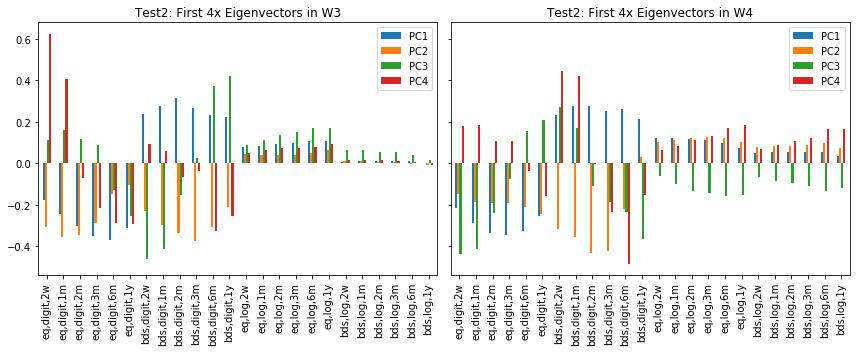



Cumulative Variance Explained (top 10)

      CVE_W1    CVE_W2    CVE_W3    CVE_W4
1   0.259549  0.290762  0.272153  0.292703
2   0.414198  0.429414  0.472168  0.442727
3   0.518798  0.542324  0.571221  0.570655
4   0.617638  0.631298  0.652235  0.642568
5   0.691514  0.697528  0.713323  0.709425
6   0.743714  0.754361  0.762111  0.758372
7   0.788769  0.798032  0.801491  0.801854
8   0.826287  0.839152  0.839011  0.843214
9   0.861521  0.874056  0.872049  0.878965
10  0.891479  0.906539  0.902836  0.909004


In [18]:
test_v_time('Test2')

-- PCA |  Test3  | Comparison Across Windows --
Logvol, returns from xpdMM
Note: data has been truncated to start in January 70s - explaining changes in cve (last week: 3 PCs to account for 85% of var)
Last table shows cumulative variance explained by the PCs (rows) across windows (4x)


Show chart? (y/n) y


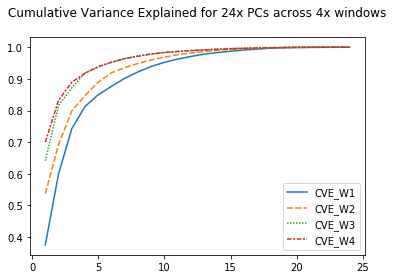

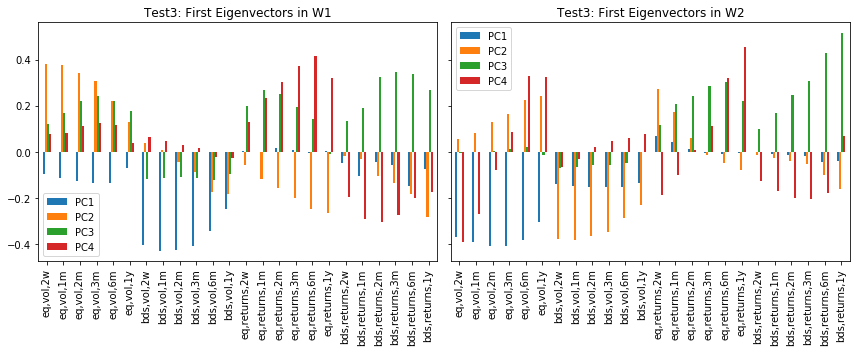

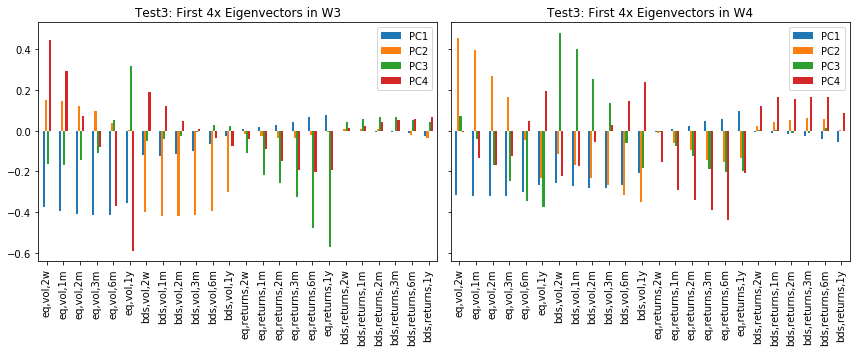



Cumulative Variance Explained (top 10)

      CVE_W1    CVE_W2    CVE_W3    CVE_W4
1   0.375453  0.537474  0.641512  0.700221
2   0.599104  0.692231  0.815803  0.832345
3   0.742498  0.798561  0.871656  0.889208
4   0.812658  0.847594  0.918843  0.917954
5   0.849689  0.889496  0.937268  0.938713
6   0.876536  0.919375  0.952520  0.952544
7   0.901718  0.935482  0.964420  0.964024
8   0.922018  0.948634  0.972124  0.971519
9   0.939138  0.960089  0.978436  0.978774
10  0.952342  0.968829  0.983110  0.983568


In [19]:
test_v_time('Test3')

-- PCA |  Test4  | Comparison Across Windows --
Logvol, returns from xpdMM
Note: data has been truncated to start in January 70s - explaining changes in cve (last week: 3 PCs to account for 85% of var)
Last table shows cumulative variance explained by the PCs (rows) across windows (4x)


Show chart? (y/n) y


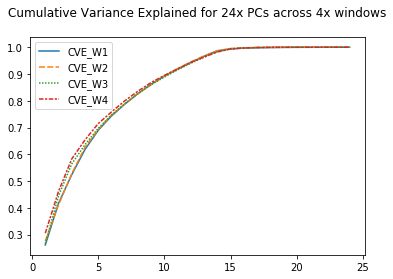

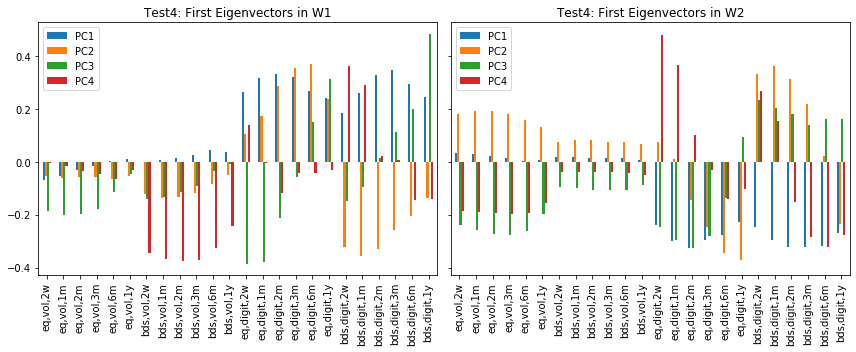

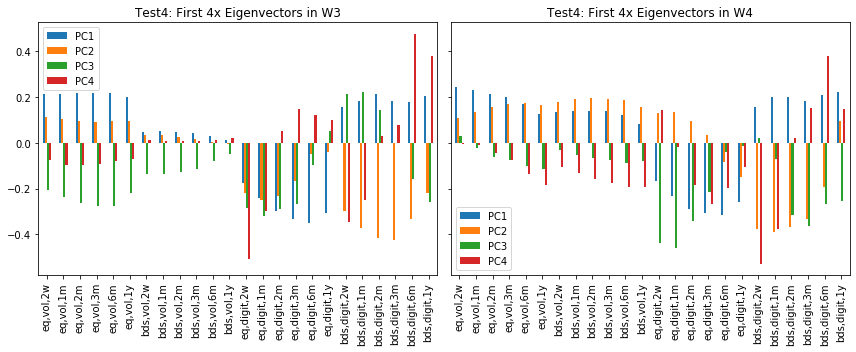



Cumulative Variance Explained (top 10)

      CVE_W1    CVE_W2    CVE_W3    CVE_W4
1   0.261532  0.275731  0.266079  0.305387
2   0.416848  0.411160  0.444948  0.461753
3   0.524033  0.527698  0.564106  0.582838
4   0.618031  0.626103  0.636211  0.653928
5   0.689742  0.692885  0.697251  0.714680
6   0.743161  0.746396  0.746908  0.758341
7   0.787155  0.787865  0.788607  0.799604
8   0.826351  0.826939  0.827361  0.835864
9   0.862032  0.859992  0.860080  0.868335
10  0.892364  0.891821  0.888554  0.894890


In [20]:
test_v_time('Test4')

-- Robutness Tests -- 
Are vectors stable across lookback periods? How about across windows?


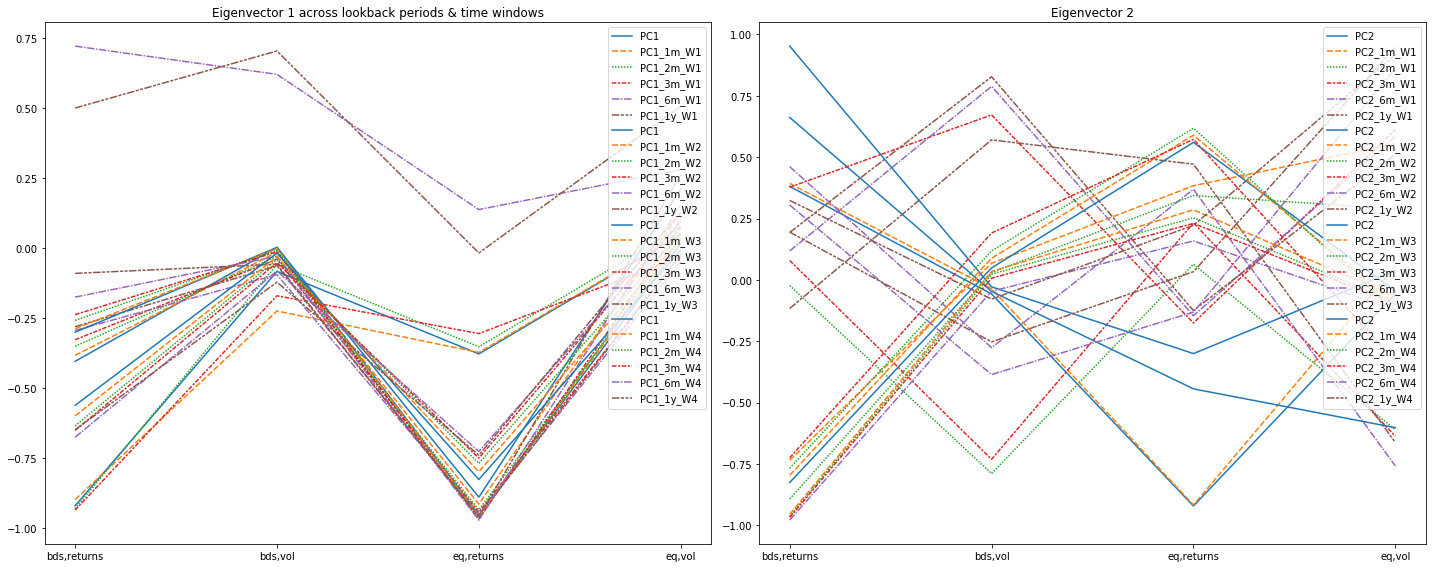

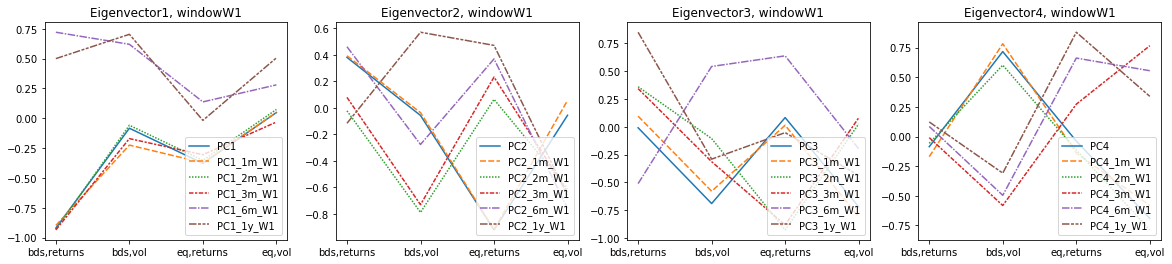

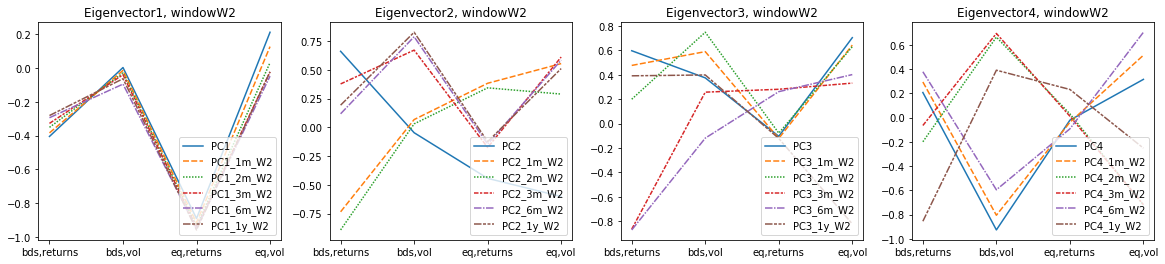

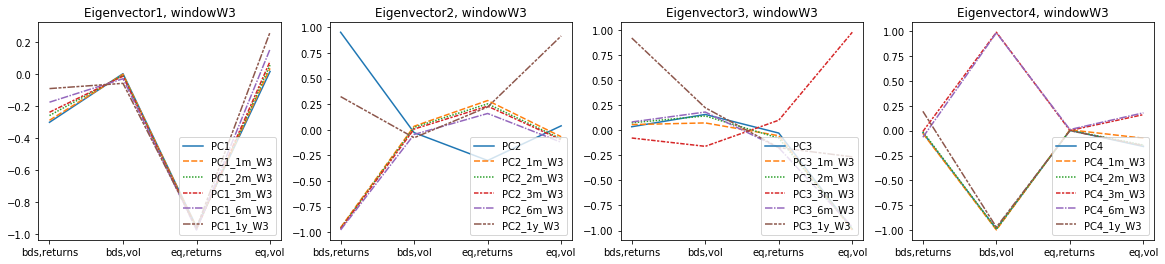

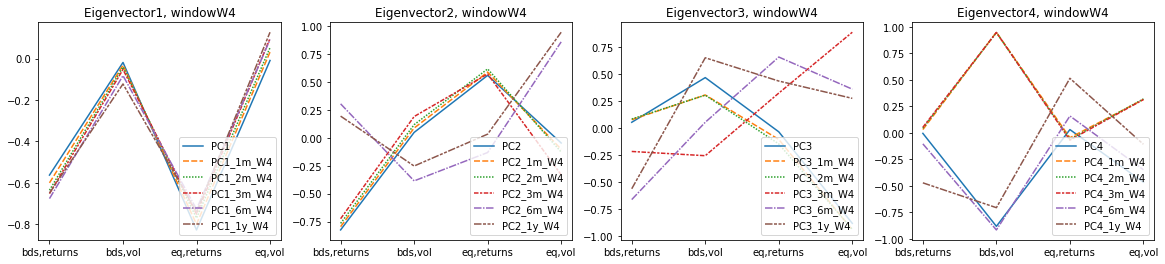

In [21]:
### At this point: logvol ou vol | digit ou returns
# Critères des bons PCs: caractère interprétable & narratif des vecteurs + stabilité across 4x windows (DONE)

print('-- Robutness Tests -- ')
print('Are vectors stable across lookback periods? How about across windows?')
tests = ['Test1', 'Test2','Test3','Test4']
wds = ['W1','W2', 'W3', 'W4']
periods = ['2w', '1m', '2m', '3m', '6m', '1y']

### Robustness test 1 
### Are eigenvectors stable across lookback periods? (What we did last week)
### On teste sur vol pct | returns (meilleur "coude")
for w in wds: 
    for p in periods: 
        pcbook[w+',Test5,'+p] = bruteforcePCA(norm_c[w],period=p, spec= 'returns|vol', exclusion = 'log')

hstacks = {} # Va contenir 4 dataframes, contenant les comparaisons de pcs sur toutes les périodes (donc 6)
dummy_index = ['eq,returns','bds,returns', 'eq,vol', 'bds,vol'] 

for w in wds: 
    cps_list = [] #cps like comp pcs :)
    for c in pcbook[w+',Test5,2w'][1].columns: 
        hstack = pd.DataFrame(data = {}, index = dummy_index)
        i = 0
        for p in periods:
            hstack = hstack.join(pcbook[w+',Test5,'+p][1].set_index(pd.Index(dummy_index),drop=True).loc[:,c],rsuffix= '_'+periods[i]+'_'+w)
            i +=1
        cps_list.append(hstack) 
    hstacks[w+'_Comp'] = cps_list # Hstacks has 4 instances. Each is a list of 6 elements (pds) including 4 pcs. 

### Pour le côté artistique
#Part I 
f, (ax1,ax2) = plt.subplots(1,2, figsize = (20,8))
for w in wds:
    sns.lineplot(data = hstacks[w+'_Comp'][0], ax=ax1)
    ax1.legend(loc = 'upper right')
    ax1.set_title('Eigenvector 1 across lookback periods & time windows')
    sns.lineplot(data = hstacks[w+'_Comp'][1], ax=ax2)
    ax2.legend(loc= 'upper right')
    ax2.set_title('Eigenvector 2')
    plt.tight_layout()
    
## Separating results
for w in wds:
    f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (20,4))
    sns.lineplot(data = hstacks[w+'_Comp'][0], ax=ax1)
    sns.lineplot(data = hstacks[w+'_Comp'][1], ax=ax2)
    sns.lineplot(data = hstacks[w+'_Comp'][2], ax=ax3)
    sns.lineplot(data = hstacks[w+'_Comp'][3], ax=ax4)
    i = 1
    for _ in (ax1,ax2,ax3,ax4):
        _.legend(loc = 'lower right')
        _.set_title('Eigenvector'+str(i)+', window'+w)
        i +=1


 
-- Robustness Test | Random pop -- 
Are vectors stable whenever we randomly pop features?
Feature popped this time:  3m


Display first 4x vectors (without rpop)? (y/n) y


<Figure size 432x288 with 0 Axes>

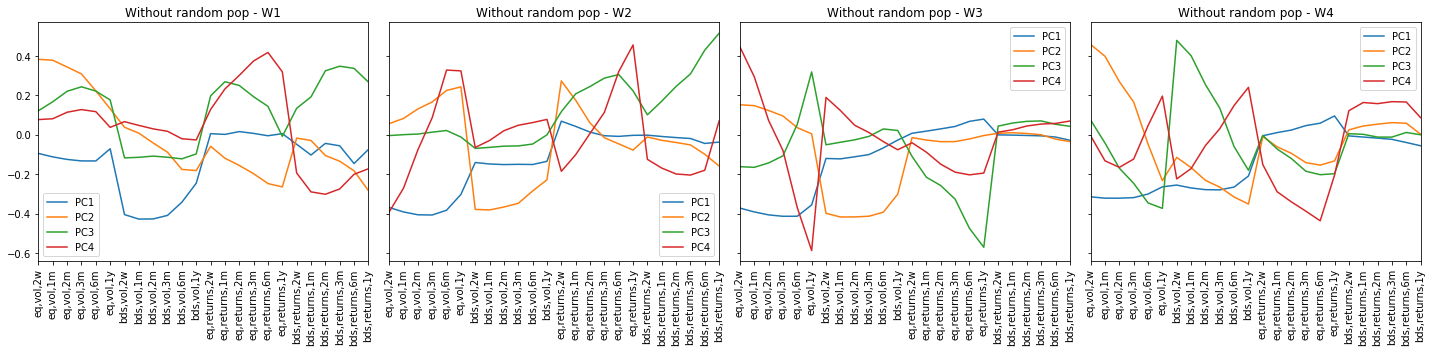

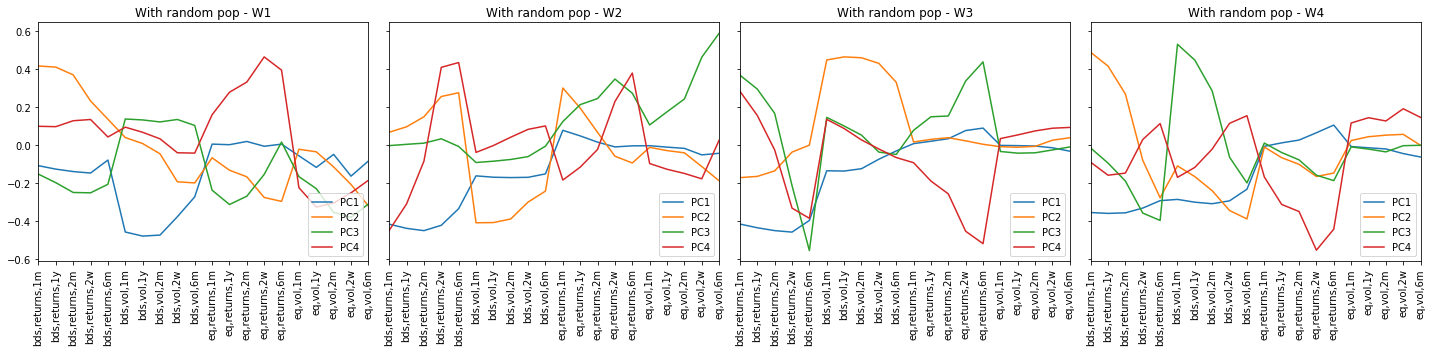

In [22]:
### Robustness test 2
### Are eigenvectors stable whenever we remove a random period? [bruteforcePCA updated to support]
# Remove random period + generate new vectors 
def random_pop(test1, t1spec, t1excl): 
    
    periods = ['2w', '1m', '2m', '3m', '6m', '1y']
    item = periods.pop(periods.index(random.choice(periods)))
    pshuffle = [_ for _ in periods if _ != item]
    rpops = {}
    for w in wds: 
        rpops[w] = bruteforcePCA(norm_c[w], period = '|'.join(pshuffle), spec = t1spec, exclusion = t1excl) 
    
    print(' ')
    print('-- Robustness Test | Random pop -- ')
    print('Are vectors stable whenever we randomly pop features?')
    print('Feature popped this time: ', item)
    
    # Plotting first 3 pcs for test 3 (original, all features) 
    rep = input('Display first 4x vectors (without rpop)? (y/n)')
    if rep == 'y': 
        f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True, figsize = (20,5))
        axes = [ax1,ax2,ax3,ax4] 
        i = 0
        for w in wds:
            pcbook[w+','+test1][1].loc[:,'PC1':'PC4'].plot(ax = axes[i])
            axes[i].set_xticks(range(len(pcbook[w+','+test1][1].index)))
            axes[i].set_title('Without random pop - '+w) 
            axes[i].set_xticklabels(labels = pcbook[w+','+test1][1].index, rotation=90)
            i +=1
        plt.tight_layout()
    else:
        pass

    # Vs test: randomly dropped 
    f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True, figsize = (20,5))
    axes = [ax1,ax2,ax3,ax4] 
    i = 0
    for w in wds:
        rpops[w][1].loc[:,'PC1':'PC4'].plot(ax = axes[i])
        axes[i].set_title('With random pop - '+w) 
        axes[i].set_xticks(range(len(rpops[w][1].index)))
        axes[i].set_xticklabels(labels = rpops[w][1].index.sort_values(), rotation=90)
        axes[i].legend(loc='lower right')
        i +=1
    
    plt.tight_layout()
    

plt.suptitle('4x PCs as measured through expanding windows (start: 1970, freq = 10Y)', y=1.01, size = 'x-large')
plt.tight_layout()

random_pop('Test3', 'returns|vol', 'log')

-- PCA |  Test7  | Comparison Across Windows --
Logvol, returns from xpdMM
Note: data has been truncated to start in January 70s - explaining changes in cve (last week: 3 PCs to account for 85% of var)
Last table shows cumulative variance explained by the PCs (rows) across windows (4x)


Show chart? (y/n) n




Cumulative Variance Explained (top 10)

      CVE_W1    CVE_W2    CVE_W3    CVE_W4
1   0.295599  0.328177  0.561832  0.641271
2   0.475687  0.585823  0.749010  0.761241
3   0.622182  0.683786  0.841156  0.829009
4   0.719350  0.761818  0.891016  0.877551
5   0.772588  0.819209  0.916496  0.902058
6   0.817488  0.854874  0.936795  0.922590
7   0.841640  0.882626  0.947565  0.938100
8   0.864482  0.902394  0.957020  0.948737
9   0.883600  0.919109  0.964373  0.958489
10  0.901470  0.935522  0.971405  0.965654
 
-- Robustness Test | Random pop -- 
Are vectors stable whenever we randomly pop features?
Feature popped this time:  2w


Display first 4x vectors (without rpop)? (y/n) n


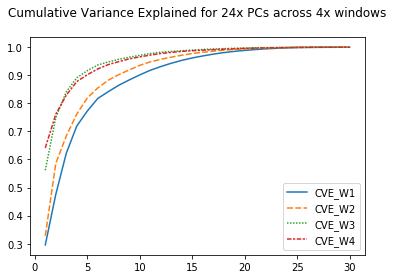

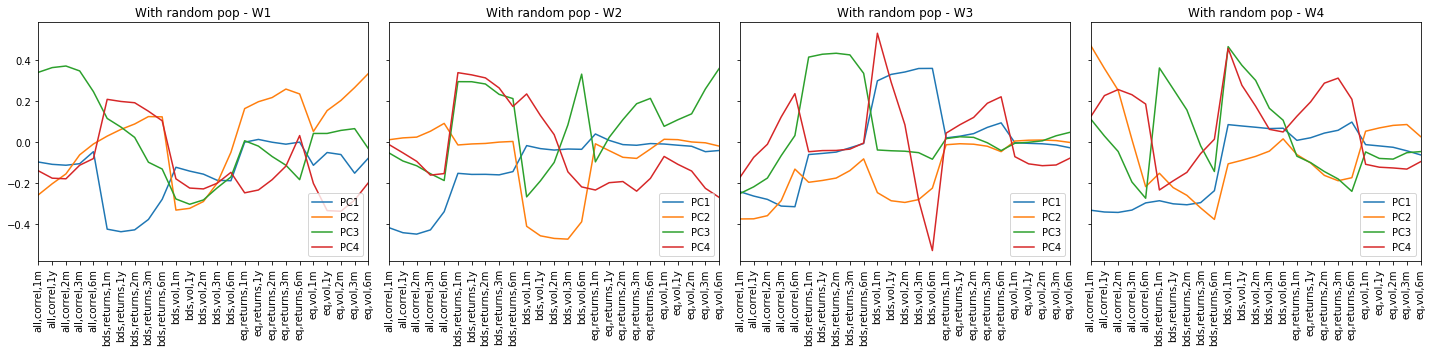

In [23]:
## Adding up correl
### How it goes: returns | vol | correl, periods = all, excl = log
for w in wds: 
    pcbook[w+',Test7'] = bruteforcePCA(norm_c[w], spec = 'vol|returns|correl', exclusion = 'log')
    
test_v_time('Test7')
random_pop('Test7', 'vol|returns|correl','log')

-- PCA |  Test8  | Comparison Across Windows --
Logvol, returns from xpdMM
Note: data has been truncated to start in January 70s - explaining changes in cve (last week: 3 PCs to account for 85% of var)
Last table shows cumulative variance explained by the PCs (rows) across windows (4x)


Show chart? (y/n) n




Cumulative Variance Explained (top 10)

      CVE_W1    CVE_W2    CVE_W3    CVE_W4
1   0.205580  0.225663  0.416746  0.405148
2   0.330867  0.398331  0.555152  0.536157
3   0.436960  0.501697  0.636241  0.619939
4   0.512504  0.579667  0.704205  0.683173
5   0.585096  0.643362  0.756591  0.730461
6   0.644553  0.697821  0.793221  0.771009
7   0.690022  0.740052  0.828651  0.810781
8   0.730115  0.779327  0.857445  0.843141
9   0.765606  0.809876  0.881725  0.871146
10  0.798735  0.836036  0.903779  0.895701
 
-- Robustness Test | Random pop -- 
Are vectors stable whenever we randomly pop features?
Feature popped this time:  2m


Display first 4x vectors (without rpop)? (y/n) n


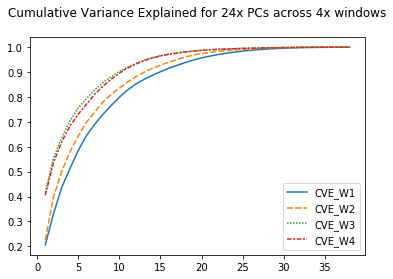

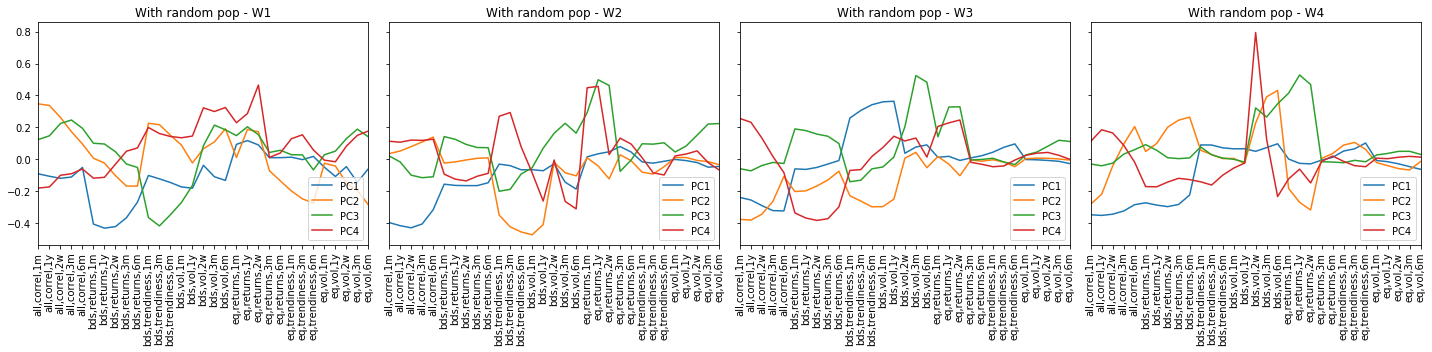

In [24]:
### Adding up trendiness 
### How it goes: returns | vol | correl, periods = all, excl = log 
### And we repeat the two robustness tests (or only the first, since it's 12am already)
for w in wds: 
    pcbook[w+',Test8'] = bruteforcePCA(norm_c[w], spec = 'vol|returns|correl|trendiness', exclusion = 'log')
    
test_v_time('Test8')
random_pop('Test8', 'vol|returns|correl|trendiness','log')

In [722]:
# Exporting results from pcbook to excel 
# One wb per Test, one sheet per Windows, showing 1/ Eigenvalues [2] 2/ Eigenvectors [1 df] 3/ Coordinates [0 df]
from openpyxl import Workbook
import openpyxl

tests = ['Test7','Test8']
wds = ['W1','W2', 'W3', 'W4']

wb = Workbook()
for test in tests: 
    for wd in wds:
        ws = wb.create_sheet(title = wd)
    try: 
        wb.remove_sheet('Sheet')
    except ValueError:
        pass
    wb.save(test+'.xlsx')

for test in tests: 
    wb= openpyxl.load_workbook(test+'.xlsx')
    writer = pd.ExcelWriter(test+'.xlsx', engine = 'openpyxl')
    for wd in wds: 
        pd.DataFrame(data= pcbook[wd+','+test][2]).T.to_excel(writer, sheet_name= wd, engine ='openpyxl')
        lena = len(wb.active['A'])+2
        pcbook[wd+','+test][1].to_excel(writer, sheet_name = wd, startrow = lena, engine='openpyxl') 
        lenb = len(pcbook[wd+','+test][1])+6
        pcbook[wd+','+test][0].to_excel(writer, sheet_name=wd,startrow = lenb,engine='openpyxl')
    writer.save()
    writer.close()

In [ ]:
### Expanding PCA
# L'idée: on split norm_c en overlapping periods de min 10 ans, on stocke l'habituel
# Params: returns | vol, exclusion= logvol, periods = all but virer la correl 2w. 
# Options: freq = '1Y' | '10Y' (mais replace first/last bc index)
# Mass export!

import datetime as dt
xpd_pcbook = {} 
xpd_wd = {}

def xpd_wdsplit(data, vfreq: str, vstart: str, vend:str):
    global xpd_wd
    xpd_wd = {}
    split_d =  list(pd.date_range(start = vstart, end = vend, freq = vfreq))
    split_d[0] = data.index[data.index.get_loc(vstart)]
    split_d.append(data.index[data.index.get_loc(vend)])
    i = 1
    while i < len(split_d):
        xpd_wd[str(split_d[0].year)+','+str(split_d[i].year)] = data.loc[split_d[0]:split_d[i],:]
        i +=1 
        
# Splitting dset in expanding windows
xpd_wdsplit(norm['Tk'],vfreq = '10Y', vstart = norm['Tk'].index[0], vend= norm['Tk'].index[-1])  

# Looping
for wd in xpd_wd.keys(): 
    xpd_pcbook[wd] = bruteforcePCA(data = xpd_wd[wd], period = 'all', spec = 'returns|vol|correl', exclusion = 'log')
    
'''
### Exporting 
from openpyxl import Workbook
import openpyxl
wb = Workbook()
for wd in xpd_pcbook.keys():
    ws = wb.create_sheet(title = wd)
try: 
    wb.remove_sheet('Sheet')
except ValueError:
    pass

wb.save('xpdPCA_10Y_WithCorrel_Start70.xlsx')
wb= openpyxl.load_workbook('xpdPCA_10Y_WithCorrel_Start70.xlsx')
writer = pd.ExcelWriter('xpdPCA_10Y_WithCorrel_Start70.xlsx', engine = 'openpyxl')
for wd in xpd_pcbook.keys(): 
    pd.DataFrame(data= xpd_pcbook[wd][2]).T.to_excel(writer, sheet_name= wd, engine ='openpyxl')
    lena = len(wb.active['A'])+2
    xpd_pcbook[wd][1].to_excel(writer, sheet_name = wd, startrow = lena, engine='openpyxl') 
    lenb = len(xpd_pcbook[wd][1])+6
    xpd_pcbook[wd][0].to_excel(writer, sheet_name=wd,startrow = lenb,engine='openpyxl')
    
writer.save()
writer.close()
'''

Available keys in xpd_wd: ['1970,1980', '1970,1990', '1970,2000', '1970,2010', '1970,2019'] 



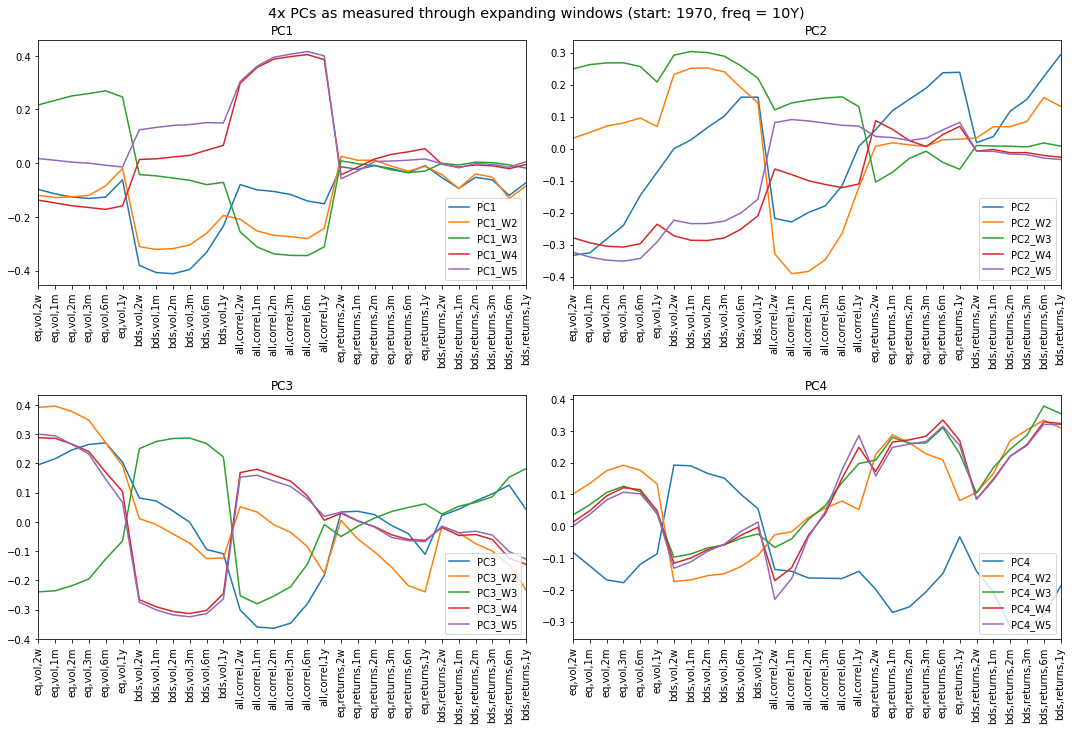

In [26]:
## On représente l'évolution des vecteurs dans le temps - work on xpd_pcbook | xpd_wd (len = 53) | vmat = 30*30 
print('Available keys in xpd_wd:', [key for key in xpd_wd.keys()],'\n')

def comp_pcs(pcb,npc): #like pcbook #n° of pc you want to compare 
    # Prep table dim (len(xpd_pcbook['1966,1967'][1])* len xpd_wd) (nb of features * nb of windows compared)
    comp_index = pcb[list(pcb.keys())[0]][1].index
    comp_df = pd.DataFrame(data = {}, index = comp_index)
    for k in xpd_pcbook.keys():
        export_col = pcb[k][1].loc[:,'PC'+str(npc)].copy()
        #export_col = export_col.set_index(comp_index, drop = True)
        comp_df = comp_df.join(export_col, rsuffix = '_W'+str(list(pcb.keys()).index(k)+1))
    
    return comp_df
        
# Plot - C'est plus propre
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (15,10))
axes = [ax1,ax2,ax3,ax4]
for i in range(1,5): 
    comp_pcs(xpd_pcbook,i).plot(ax = axes[i-1])
    axes[i-1].set_xticks(range(len(comp_pcs(xpd_pcbook,1).index)))
    axes[i-1].set_xticklabels(comp_pcs(xpd_pcbook,1).index, rotation=90)
    axes[i-1].set_title('PC'+str(i)) 
    axes[i-1].legend(loc= 'lower right')

plt.suptitle('4x PCs as measured through expanding windows (start: 1970, freq = 10Y)', y=1.01, size = 'x-large')
plt.tight_layout()

In [80]:
### Fix graphs - DONE (raison? Unknown. https://stackoverflow.com/questions/50805666/showing-index-as-xticks-for-pandas-plot)
### Create [6] for actual coordinates - DONE
### Get the analysis back to 70 - DONE
### Keep 10Y running - DONE
### Then look for: k-means, k-medoid, mean-shift, fuzzy c-means, fuzzy medoids, GMM

    # General notes
    # Function should allow tests on different dsets so as to remove/add correl, with different nb of pcs considered (- truncature of [5] -)
    # Function should allow tests for a range of k 
    # Keep in mind: has to be looped over some transformed features over some xpd_wds (training/testing outlook)
    # Results should be stored so as to be compared + store a batch of clustering metrics, too 
    # Fortunately, sklearn.cluster class contains: k_means,k_means_elkan, mean_shift, dbscan 

# Stores transformed features computed using the npc first vectors over the first nwd expanding windows
# Note: on utilisait 'transformed_fts[key] = pcbook[key][5].iloc[:,:npc]'...
def trainable(pcbook, npc:int, nwd: int): 
    transformed_fts = {} 
    for key in pcbook.keys():
        if list(pcbook.keys()).index(key) <= nwd-1: 
            df_col= []
            for i in range(1, len(pcbook[key][1])+1): 
                df_col.append('Tft_'+str(i)) 
            transformed_fts[key] = np.matmul(xpd_wd[key].loc[:,pcbook[key][6]], pcbook[key][1])
            transformed_fts[key].columns = df_col
            transformed_fts[key] = transformed_fts[key].iloc[:,:npc]
    return transformed_fts

# Shuffle all subsets of data stored in pcb
def shuffle(pcbook):
    for key in pcbook.keys(): 
        pcbook[key] = pcbook[key].sample(frac=1)
    return pcbook

# Display scatterplots with clusters + centroïds/medoïds based on 4 first dimensions (for now)
# Tested on: display_facets(trainable(xpcb4,4,1), k_means,6)
def display_facets(trainable, cluster_method, k, display_on = 1, loop= False): 
    clustered = cluster_method(trainable,k)
    for key in clustered.keys():
        plt.close()
        df = trainable[key].join(clustered[key][0])
        g = sns.FacetGrid(df, hue = 'in_cluster', height=5)
        g = g.map(plt.scatter, 'Tft_1', 'Tft_2', edgecolor = 'w').add_legend().fig.suptitle('Window =  '+key)
        plt.scatter(clustered[key][1].loc[:,'Tft_1'], clustered[key][1].loc[:,'Tft_2'], c='black')
        plt.show()
        if loop == False:
            g = sns.FacetGrid(df, hue = 'in_cluster', height=5)
            g = g.map(plt.scatter, 'Tft_3', 'Tft_4', edgecolor = 'w').add_legend().fig.suptitle('Window = '+key)
            plt.scatter(clustered[key][1].loc[:,'Tft_3'], clustered[key][1].loc[:,'Tft_4'], c='black')
            plt.show()
        if display_on == 1: 
            break    

# Display lineplot with hue on original features (use: select features by filtering Data)
# Tested on: display_line(data_pct.filter(regex = 'Average$'),trainable(xpcb4,4,1), k_means, 6, display_on = 1)
def display_line(data, trainable, cluster_method, k, display_on = 1):
    clustered = cluster_method(trainable,k)
    for key in clustered.keys():
        df = data.join(clustered[key][0], how='inner')
        df_empt = pd.DataFrame(data = {'RangeIndex': range(len(df))}, index= df.index)
        df = df.join(df_empt)
        colors = ['indigo','plum','slategray','seagreen', 'tan', 'darksalmon', 'lightcoral', 'darkmagenta']
        for feature in data.columns: 
            fig, ax = plt.subplots(figsize = (7,4))
            i = 0
            for k, g in df.groupby('in_cluster'):
                g.plot(kind = 'scatter', ax=ax, x= 'RangeIndex', y=feature, color = colors[i], lw=0.1)
                i +=1
            plt.show()
        if display_on == 1:
            break

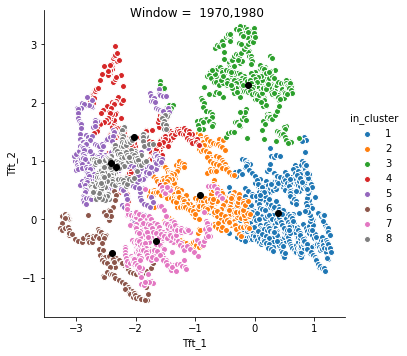

Testing over first window (70-80) with nb of clusters = range(3,9).
Models' inertia (wrong metrics): [6398.840728669449, 5452.08522653459, 4777.526827678643, 4462.335376598247, 4156.491321856358, 3893.336417239797]
Location of phases on data_pct averages (trendiness is left aside):


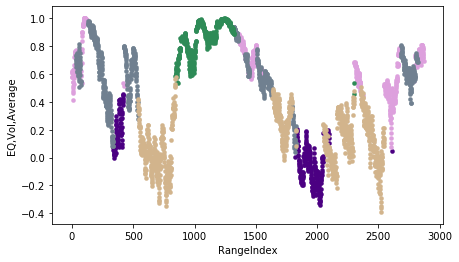

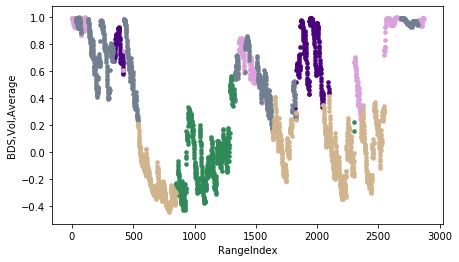

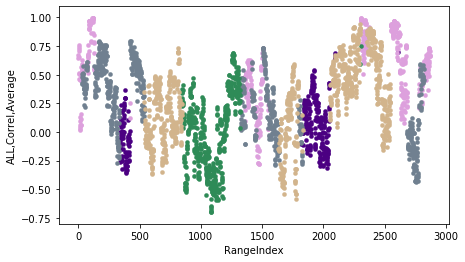

Testing with reshuffle for 5 regimes
Successive inertias: [4777.526827678642, 4777.526827678642, 4777.526827678643, 4777.526827678643, 4777.526827678642, 4777.526827678643, 4777.531725707928, 4777.526827678642, 4777.526827678643, 4777.526827678643]


In [64]:
#### K-Means Tests 
# Reminder:  falls into local minima. Might be useful to shuffle & restart [n_init though...]
# Function parameters: random_state = Seed or do not seed...
# n_init = nb of times the algo will be re-run with randomly allocated initial centroïds. Final output = best in terms of inertia.
# algorithm = elkan (faster cv since matrix isn't sparse)

from IPython import display
from sklearn.cluster import KMeans

##########

def k_means(pcbook, k): 
    kmeanb = {}
    cluster_index = pd.Index(['Cluster_'+str(i) for i in range(1,k+1)])
    for key in pcbook.keys(): 
        storage = []
        kmeans = KMeans(n_clusters=k, random_state=42, n_jobs = -1, algorithm= 'elkan').fit(pcbook[key])
        labels = pd.DataFrame(data = kmeans.labels_, columns = ['in_cluster'], index = pcbook[key].index)
        labels['in_cluster'] = labels['in_cluster'] + 1
        storage.append(labels) # [0] Cluster n°
        storage.append(pd.DataFrame(data = kmeans.cluster_centers_, columns = pcbook[key].columns, index = cluster_index)) # [1] Centroïd coordinates (one row = one cluster)
        storage.append(pd.DataFrame(data = kmeans.transform(pcbook[key]), index = pcbook[key].index, columns = cluster_index)) # [2] Transforms dset into cluster-distance space. Logically turns sparse matrices into dense ones. 
        storage.append(kmeans.inertia_) # [3] Somme des inerties intraclasses
        kmeanb[key] = storage
        #if len(kmeanb.keys()) == 1:
            #return storage
    #if len(kmeanb.keys()) != 1: 
    return kmeanb

##########

# Looping for 4 features for now 
xpcb4 = {}
for wd in xpd_wd.keys(): 
    xpcb4[wd] = bruteforcePCA(data = xpd_wd[wd], period = 'all', spec = 'returns|vol', exclusion = 'log')
    
# Tester avec un nombre variable de clusters
inertias = []
for i in range(3,9): 
    for key in trainable(xpcb4,4,1).keys():
        inertias.append(k_means(trainable(xpcb4,4,1),i)[key][3])
    display.clear_output(wait=True)
    display_facets(trainable(xpcb4,4,1),k_means,i, loop=True)
    time.sleep(1.5)

print('Testing over first window (70-80) with nb of clusters = range(3,9).')
print('Models\' inertia (wrong metrics):', inertias)
print('Location of phases on data_pct averages (trendiness is left aside):')
data_pct = pd.read_excel('Data-StdPct.xlsx', skiprows= range(4)).set_index('Dates')
display_line(data_pct.drop(['EQ,Trendiness,Average','BDS,Trendiness,Average'], axis= 1).filter(regex = 'Average$'), trainable(xpcb4,4,1),k_means,5)
print('Testing with reshuffle for 5 regimes')    
inertias = []
for i in range(10):
    for key in trainable(xpcb4,4,1).keys():
        inertias.append(k_means(shuffle(trainable(xpcb4,4,1)),k=5)[key][3])
print('Successive inertias:', inertias)


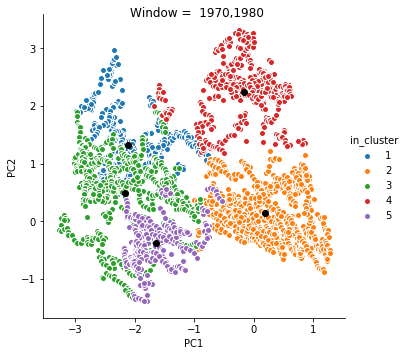

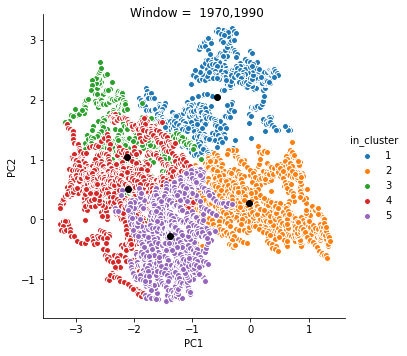


-- Summary for k_means with 5 clusters over first 2 periods -- 

Period considered: 1970,1980
Inertia given 5 clusters:  2836.4827843627263
Centroïds location: 
                 PC1       PC2       PC3       PC4
Cluster_1 -2.108666  1.329828  0.733301 -0.695257
Cluster_2  0.195401  0.139899  0.034354 -0.396112
Cluster_3 -2.157066  0.486232 -0.743335 -0.379299
Cluster_4 -0.172250  2.238803 -0.312371 -0.360321
Cluster_5 -1.649868 -0.386420  0.906601 -0.212049

Period considered: 1970,1990
Inertia given 5 clusters:  5062.642658032848
Centroïds location: 
                 PC1       PC2       PC3       PC4
Cluster_1 -0.578147  2.052633  0.138406  0.293630
Cluster_2 -0.025580  0.278617  0.081149  0.475346
Cluster_3 -2.113993  1.042265 -0.726384  0.710037
Cluster_4 -2.106984  0.506580  0.579321  0.424821
Cluster_5 -1.376436 -0.276723 -0.636588  0.213750


In [260]:
# Tester la stabilité d'un cluster entre deux périodes 
# Sur W1 v W2 (jusqu'en 90 donc)
display_facets(trainable(xpcb4,4,2),k_means,5,display_on = 2, loop=True)
print('\n-- Summary for k_means with 5 clusters over first 2 periods -- ')
for key in trainable(xpcb4,4,2): 
    result_view = k_means(trainable(xpcb4,4,2), 5)[key]
    print('\nPeriod considered:', key)
    print('Inertia given 5 clusters: ', result_view[3]) 
    print('Centroïds location: \n', result_view[1]) 
    
# Je laisse de côté pour le moment (pour discussion)
# C'est un peu ennuyeux pcq le n_init fait que les mêmes centroïds ne sont jamais numérotés de la même manière (cf. derniers tableaux)
# Note: l'inertie n'a pas de sens, on remplace par? 

In [2]:
### K-medoid
# Keep in mind: has to be applied to all transformed features over the xpd_wds
# Notes from pyclustering: algo less sensitive to outliers than K-Means. 
# Difference w/ k-medians: median in K-Medians can be unreal objet (not from input data space) (orly?)
# Hello: pyclustering isn't included in conda packages - install with $ pip install pyclustering 
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

def k_medoids(pcbook, tolerance = None): 
    kmed = {}
    for key in pcbook.keys():
        initial_medoids = np.array(pcbook[key])
        kmedoids_instance = kmedoids(pcbook[key].as_matrix(), [[0,0,0,0]])
        kmedoids_instance.process()
        clusters = kmedoids_instance.get_clusters()
        print(clusters)
        visualizer = cluster_visualizer()
        visualizer.append_clusters(clusters,pcbook[key])
        visualizer.show()

k_medoids(trainable(xpcb4,4,1))
# Kernel appears to have died. A demain,

NameError: name 'trainable' is not defined

In [290]:
### Mean Shift
# Intérêt: pas à fixer le nombre de k + possibilité de laisser des points "non classifiés"
# Built on KDE - will place a kernel on each point in the dataset 
# Adding up all the individual kernels generate a density function 
# Mean shift updates the points by shifting them towards the nearest peak on the KDE surface.
# How to set bandwidth: skinny kernels (small bdw) = each point has its own cluster. 
# Note: c'est long.

from sklearn.cluster import MeanShift, estimate_bandwidth  

def mean_shift(pcbook, cluster_all:bool, bdw = 0): 
    msb = {}
    for key in pcbook.keys(): 
        
        storage = []
        if bdw == 0: 
            bandwidth_estimate = estimate_bandwidth(pcbook[key], quantile = 0.2)
            if cluster_all == True: 
                meanshift = MeanShift(bandwidth = bandwidth_estimate, cluster_all = True, n_jobs = -1).fit(pcbook[key])
            else:
                meanshift = MeanShift(bandwidth = bandwidth_estimate, cluster_all = False, n_jobs = -1).fit(pcbook[key])
        else:
            if cluster_all == True: 
                meanshift = MeanShift(bandwidth = bdw, cluster_all = True, n_jobs = -1).fit(pcbook[key])
            else:
                meanshift = MeanShift(bandwidth = bdw, cluster_all = False, n_jobs = -1).fit(pcbook[key])
        
        labels = pd.DataFrame(data = meanshift.labels_, columns = ['in_cluster'], index = pcbook[key].index)
        labels['in_cluster'] = labels['in_cluster']+1
        storage.append(labels) # [0] - Cluster n°
        storage.append(meanshift.cluster_centers_) # [1] - Coordinates of centroïds
        storage.append('No distances to show with mean_shift!') # [2] Distances bt points/ centroïds
        storage.append('No metrics to show for mean_shift!') # [3] "Performance" metrics
        msb[key] = storage
    
    return msb

print("MeanShift says no clusters.")
mean_shift(trainable(xpcb4,4,1), cluster_all = True)['1970,1980'][1].describe()

MeanShift says no clusters.


,in_cluster
count,2870.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
### Fuzzy-cmeans
# Keep in mind: has to be applied to all transformed features over the xpd_wds

In [ ]:
### Fuzzy medoids
# Keep in mind: has to be applied to all transformed features over the xpd_wds

In [ ]:
### GMM 
# Keep in mind: has to be applied to all transformed features over the xpd_wds

-- PCA on subsets --
Showing Cumulative Variance Explained across models

     Model_2w  Model_1m  Model_2m  Model_3m  Model_6m  Model_1y
PC1  0.361056  0.357318  0.361753  0.364155  0.364063  0.426722
PC2  0.611676  0.602966  0.600438  0.597279  0.592745  0.639146
PC3  0.718300  0.702042  0.707047  0.710414  0.711346  0.744905
PC4  0.810373  0.797107  0.804162  0.811834  0.817431  0.839751
PC5  0.892601  0.884685  0.880587  0.886980  0.907515  0.923541
PC6  0.961328  0.955138  0.949778  0.948249  0.953176  0.960306
PC7  0.996199  0.993393  0.992635  0.992087  0.990927  0.991085
PC8  0.998568  0.997160  0.997044  0.996632  0.996836  0.996576
PC9  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000 




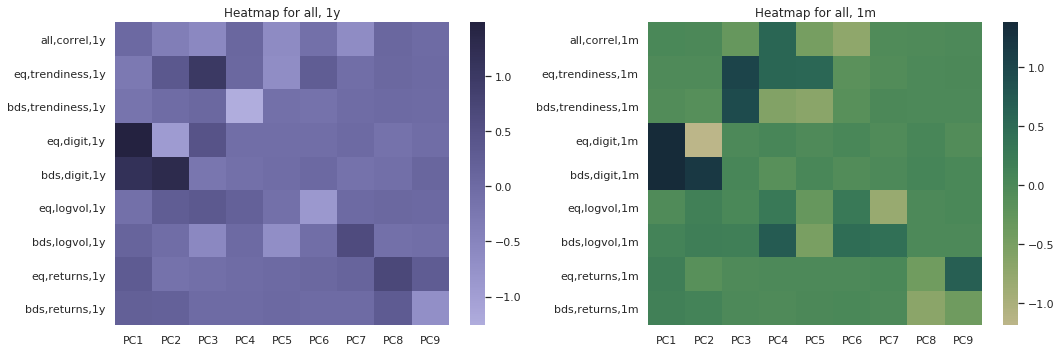



-- Showing first 4 PCs in all,1Y (With/Without returns) --



([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

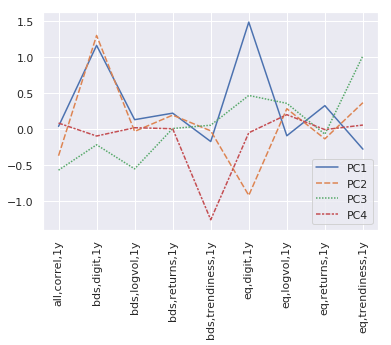

In [689]:
### OBSOLETE
# Un test "who has the most rapidly decreasing var explained"
# En regardant juste le tableau: très proche - 1y most perf; 1m combination least 
cumVarExp = pd.DataFrame(data = [pcbook[_][3].cumsum() for _ in list(pcbook.keys())[1:]]).T
cumVarExp.columns = ['Model_'+period for period in periods]
cumVarExp.index = ['PC'+str(i) for i in range(1,10)]
print('-- PCA on subsets --')
print('Showing Cumulative Variance Explained across models\n')
print(cumVarExp, '\n\n')

# Showing heatmaps for best v worst 
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,5))
ax1 = sns.heatmap(pcbook['all,1y'][4], cmap=sns.cubehelix_palette(light=0.70, rot=rotrange[0], as_cmap=True), cbar=True, ax =ax1)
ax1.set_title('Heatmap for all, 1y')
ax2 =  sns.heatmap(pcbook['all,1m'][4], cmap=sns.cubehelix_palette(light=0.70, rot=rotrange[3], as_cmap=True), cbar=True, ax=ax2)
ax2.set_title('Heatmap for all, 1m')
plt.tight_layout()
plt.show()
plt.close()

# Showing PC v Features for 4th first components, 1y #Note: bfpca doesn't return anything :) 
print('\n\n-- Showing first 4 PCs in all,1Y (With/Without returns) --\n')
fig = plt.figure()
sns.lineplot(data = pcbook['all,1y'][4].loc[:,'PC1':'PC4'])
plt.xticks(rotation=90)

-- Testing components for stability -- 
Keys available for hstacks:  ['Comp_PC1', 'Comp_PC2', 'Comp_PC3', 'Comp_PC4', 'Comp_PC5', 'Comp_PC6', 'Comp_PC7', 'Comp_PC8', 'Comp_PC9']
Example output


,PC1,PC1_1m,PC1_2m,PC1_3m,PC1_6m,PC1_1y,Stdev
correl,-0.003121,0.031685,-0.009193,-0.085337,-0.122472,0.037656,0.064821
"bds,digit",-0.071204,-0.019764,-0.090138,-0.108076,-0.097205,-0.278892,0.088011
"bds,logvol",-0.121972,-0.072517,-0.138782,-0.164052,-0.169595,-0.172688,0.038479
"bds,returns",1.373514,1.383215,1.379678,1.374702,1.400347,1.487619,0.044075
"bds,trendiness",1.381443,1.364550,1.356063,1.354504,1.312799,1.163808,0.080833
"eq,digit",-0.014216,-0.037448,-0.052470,-0.043789,-0.044797,-0.092916,0.025757
"eq,logvol",0.095075,0.107782,0.107622,0.022815,0.063716,0.130993,0.038765
"eq,returns",0.127534,0.189876,0.205396,0.226420,0.268846,0.326354,0.068278
"eq,trendiness",0.132158,0.163859,0.177321,0.183811,0.204662,0.221530,0.031312


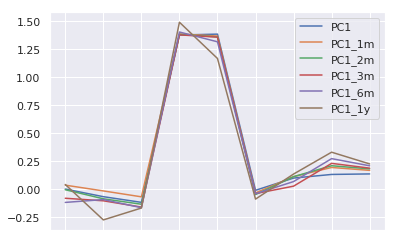

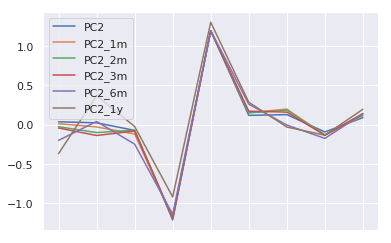

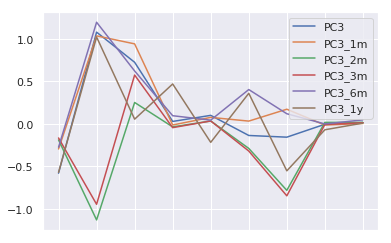

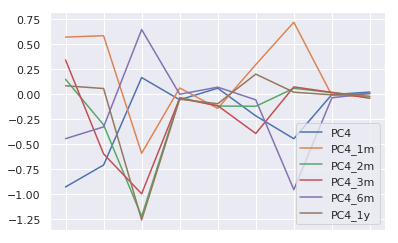

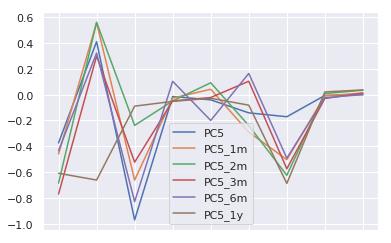

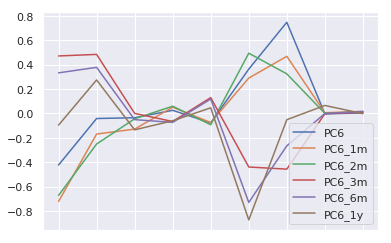

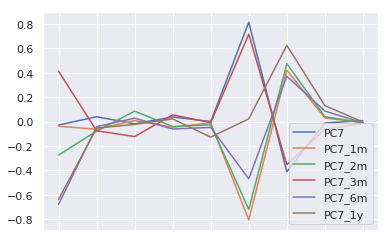

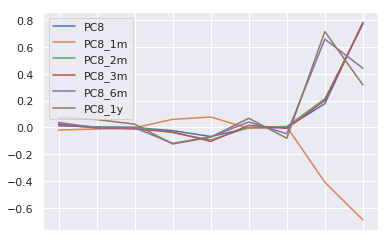

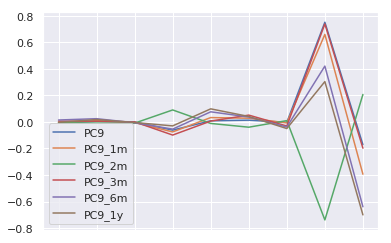

In [696]:
### OBSOLETE
# Test for PCs stability? 
hstacks = {}
dummy_index = ['correl','bds,digit','bds,logvol','bds,returns', 'bds,trendiness', 'eq,digit','eq,logvol','eq,returns', 'eq,trendiness']
i=1
while i < 10: 
    j = 0 
    hstack = pd.DataFrame(data = {}, index= dummy_index)
    for _ in list(pcbook.keys())[1:]: 
        hstack = hstack.join(pcbook[_][4].set_index(pd.Index(dummy_index), drop= True).loc[:,'PC'+str(i)], rsuffix = '_'+periods[j])
        j +=1
    hstack['Stdev'] = hstack.std(axis=1)
    hstacks['Comp_PC'+str(i)] = hstack
    i+= 1

print('-- Testing components for stability -- ')
print('Keys available for hstacks: ', list(hstacks.keys()))
print('Example output')
for _ in hstacks.keys():
    hstacks[_].iloc[:,:-1].plot()
    
hstacks['Comp_PC1']

In [ ]:
### Past results 
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
df= pcbook['returns,logvol,all'][0]
ax.scatter3D(df['PC1'], df['PC2'], df['PC3'], 'gray')

### Past results 
# Une représentation 3d pour la route
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
df= pcbook['all,1y'][0]
ax.scatter3D(df['PC1'], df['PC2'], df['PC3'], 'gray')